Step1: Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.cohort_utils import build_cohort_columns, cohort_retention


df = pd.read_csv("../data/cleaned_online_retail.csv")

df['order_month'] = pd.to_datetime(df['order_month'])
df['cohort_month'] = pd.to_datetime(df['order_month'])

print("Unique cohort_index values:", df['cohort_index'].nunique())
print(df['cohort_index'].value_counts().sort_index().head())


Unique cohort_index values: 13
cohort_index
1    118753
2     27865
3     26989
4     27254
5     25425
Name: count, dtype: int64


Step2: build a function to create retention tables

In [10]:
def cohort_retention(data):
    cohort_data = (
        data.groupby(['cohort_month', 'cohort_index'])['customerid']
            .nunique()
            .reset_index()
    )
    
    if cohort_data.empty:
        return None
    
    cohort_pivot = cohort_data.pivot(
        index='cohort_month',
        columns='cohort_index',
        values='customerid'
    )
    
    # safety check 
    if cohort_pivot.shape[1] == 0:
        return None
    
    cohort_size = cohort_pivot.iloc[:, 0]
    retention = cohort_pivot.divide(cohort_size, axis=0)
    
    return retention

Step3: Overall retention heatmap

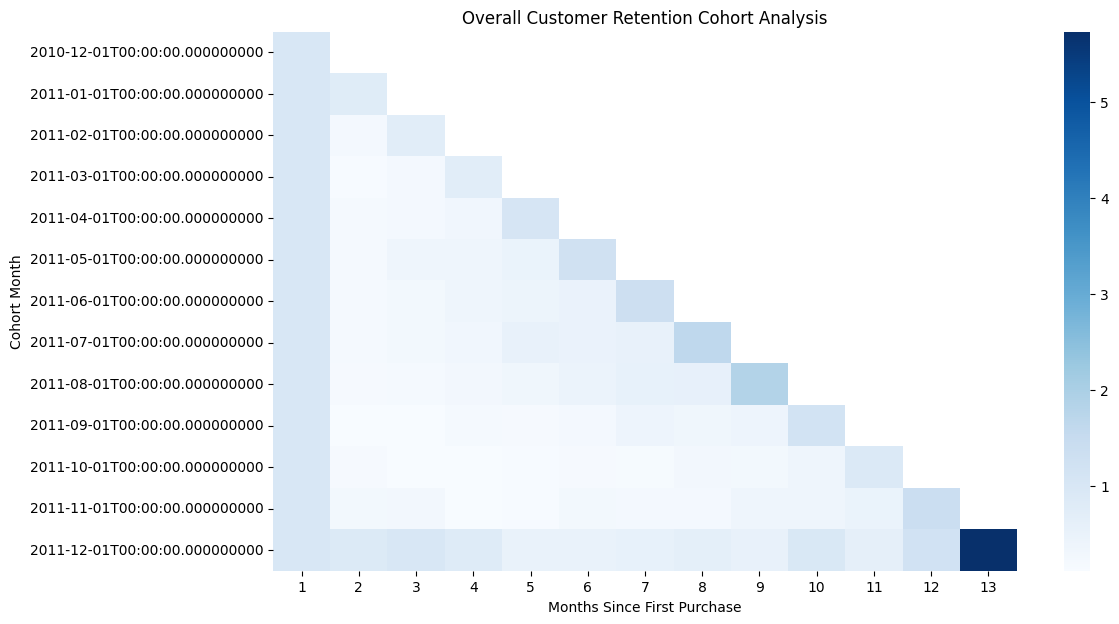

In [11]:
overall_retention = cohort_retention(df)

if overall_retention is not None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(overall_retention, cmap="Blues")
    plt.title("Overall Customer Retention Cohort Analysis")
    plt.xlabel("Months Since First Purchase")
    plt.ylabel("Cohort Month")
    plt.show()

Step4: Compare retention by country

In [12]:
top_countries = df['country'].value_counts().head(5).index

print("\nChecking which countries have usable cohort data:")
valid_countries = []


for country in top_countries:
    ret = cohort_retention(df[df['country'] == country])
    
    if ret is None:
        print(country, "→ Not enough data")
    else:
        print(country, "→ OK")
        valid_countries.append(country)
        


Checking which countries have usable cohort data:
United Kingdom → OK
Germany → OK
France → OK
EIRE → OK
Spain → OK


Step 5: visualize one strong vs one weak country

Step 6: Create customer value segments

In [ ]:
customer_revenue = df.groupby('customerid')['revenue'].sum().reset_index()

customer_revenue['segment'] = pd.qcut(
    customer_revenue['revenue'],
    q=3,
    labels=['Low Value', 'Mid Value', 'High Value'])

df = df.merge(customer_revenue[['customerid', 'segment']], on='customerid', how="left")

for seg in df['segment'].unique():
    print(f"\nRetention for {seg} customers")
    
    seg_df = df[df['segment'] == seg]
    ret_table = cohort_retention(seg_df)
    
    if ret_table is None:
        print("Not enough data")
        
    else:
        display(ret_table.round(2))


Retention for High Value customers


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,1.0,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,1.0,0.47,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,1.0,0.31,0.55,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,1.0,0.56,0.61,0.84,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.51,0.99,0.99,1.34,4.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.43,0.63,0.95,1.12,1.53,4.72,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.60,0.74,1.06,1.89,1.97,2.51,7.77,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.34,0.55,0.76,0.95,1.53,1.79,2.16,7.37,NaN,NaN,NaN,NaN



Retention for Mid Value customers


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,1.0,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,1.0,0.11,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,1.0,0.14,0.15,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,1.0,0.13,0.11,0.16,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.19,0.29,0.24,0.24,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.26,0.24,0.33,0.36,0.26,0.39,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.19,0.26,0.32,0.41,0.26,0.16,0.44,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.32,0.23,0.28,0.39,0.32,0.47,0.28,0.51,NaN,NaN,NaN,NaN



Retention for Low Value customers


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,1.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,1.0,0.05,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,1.0,0.02,0.02,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,1.0,0.03,0.04,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.04,0.06,0.05,0.04,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.06,0.03,0.05,0.06,0.06,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.09,0.05,0.04,0.06,0.08,0.04,0.06,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.04,0.05,0.05,0.01,NaN,0.01,0.04,0.05,NaN,NaN,NaN,NaN


step 7. Final checks

In [ ]:
print("\nProject Day 3 execution complete.")


Project Day 3 execution complete.
